In [2]:
import random
import gtdynamics as gtd
from gtdynamics import ContactGoal, PointOnLink, Slice, Interval
from gtsam import Pose3, Point3

import find_holds

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import graph
from matplotlib.pyplot import figure


# Graph of the rockwall that the robot will climb
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

### Create Graph of the Rockwall that the Robot will Climb

In [3]:
def points_from_image():

    points = [[513, 32, 0.0], [575, 92, 0.0], [535, 119, 0.0], [511, 72, 0.0], [500, 105, 0.0],
              [485, 74, 0.0], [486, 49, 0.0], [446, 88, 0.0], [421, 59, 0.0], [425, 113, 0.0], [416, 105, 0.0],
              [457, 144, 0.5], [511, 173, 1.1], [447, 173, 1.1], [379, 81, -0.4], [319, 81, -0.4], [339, 92, -0.8],
              [319, 111, -0.9], [295, 103, -0.1], [281, 94, 0.1], [282, 123, 1.0],
              [376, 123, -0.1], [321, 129, 0.0], [300, 150, 1.0], [318, 164, 1.9], [348, 159, 1.4], [375, 179, 1.8],
              [386, 145, 1.0], [353, 227, 2.0], [311, 270, 2.0], [256, 224, 2.0], [230, 263, 2.0],
              [425, 203, 1.6], [489, 229, 1.1], [427, 271, 1.5], [369, 286, 1.8], [431, 325, 1.4],
              [525,207, 0.8], [541, 237, 0.9], [596, 193, 0.4], [600, 264, 0.75],
              [564, 293, 1.0], [510, 242, 1.0], [498, 276, 1.0],
              [594, 326, 0.8], [426, 355, 1.3], [388, 347, 1.6], [376, 371, 1.0],
              [489, 371, 0.5], [469, 360, 0.8],
              [326, 326, 1.9], [316, 367, 1.4], [303, 335, 1.7], [283, 364, 1.3], [251, 323, 1.5], [257, 293, 2.0],
              [205, 279, 1.8], [231, 341, 1.5], [198, 316, 1.6], [207, 387, 1.2],
              [265, 155, 1.9], [252, 136, 1.6], [254, 109, 1.3], [242, 92, 0.4], [228, 135, 0.75],
              [208, 123, 0.4], [186, 108, 0.8], [180, 145, 0.2], [149, 128, 0.6], [141, 160, 0.8], [228, 168, 1.0],
              [229, 191, 1.9], [189, 229, 1.9], [195, 178, 0.5], [166, 261, 1.9], [170, 353, 0.0], [139, 312, 0.5],
              [120, 356, 0.4], [73, 341, 1.0], [76, 382, 1.0], [33, 405, 0.4], [65, 299, 1.0], [39, 284, 1.0],
              [156, 165, 0.5], [147, 224, 1.5], [127, 201, 1.0], [122, 127, 1.0], [120, 161, 1.1], [101, 184, 1.3],
              [109, 236, 1.2], [111, 277, 1.0], [80, 275, 1.1], [74, 228, 1.5], [87, 133, 1.4], [61, 154, 1.75],
              [37, 142, 1.5], [43, 211, 1.6], [25, 187, 1.0], [10, 188, 0.0], [22, 285, 0.75], [13, 309, 0.5],
              [14, 244, 0.5], [20, 360, 0.5], [29, 324, 0.8]]

    points = np.array(points)
    
    y_height = 9
    x_height = 3
    z_height = 1
    
#     y_height = 15
#     x_height = 5
#     z_height = 1.5
    
#     y_height = 15
#     x_height = 10
#     z_height = 1.5
    
    # y_height = 30
    # x_height = 10
    # z_height = 3

    # scale for 4ft long arms
    points[:, 0] = points[:, 0] / (616/y_height)  # 616 -> 30
    points[:, 1] = points[:, 1] / (423/x_height)  # 423 - > 10
    points[:, 2] = points[:, 2] / (3 / z_height) # 3 (-1 - 2ft )

    # flip x axis so that it goes 0 to 30, down to up
    points[:, 0] = np.max(points[:, 0]) - points[:, 0]
    # points = [y, x, z]
    return points

def get_uniform_points(height, width, depth=0):
    # get a uniform graph of points
    # args: height, width, depth.
    
    y_range = np.arange(0, height, 0.5)
    x_range = np.arange(0, width, 0.5)
    y_range = np.repeat(y_range, len(x_range))
    x_range = np.tile(x_range, len(y_range))
    
#     if depth is not 0:
#         # use a sin wave function to get varying depth
#         # z_range = np.arange(-1*np.pi, np.pi, np.pi/)
#         depth = np.zeros((len(zip(y_range, x_range))))
#     else:
#         depth = np.zeros((len(zip(y_range, x_range))))
    
    points = []
    for i, (y, x) in enumerate(zip(y_range, x_range)):
        # points.append([y, x, depth[i]])
        points.append([y, x, 0.0])
                       
    return np.array(points)

def get_random_points(num_points):

    # robots arms are 2ft long - 1ft per link

    points = []
    for pt in range(num_points):

        # climbing wall = 10ft X 30ft, at most 1.5 ft change in z axis
        rand_x = random.randrange(0, 100)
        rand_y = random.randrange(0, 300)
        rand_z = random.randrange(0, 10)

        # randrange needed intergers, but divide to get better data

        rand_x = rand_x / 10
        rand_y = rand_y / 10
        rand_z = rand_z / 10

        points.append([rand_x, rand_y, rand_z])

    points = np.array(points)
    return points


def plot_points(points):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    x_scale = 0.68
    y_scale = 1.0
    z_scale = 0.0048 * 100

    # x_scale = 1.0
    # y_scale = 1.0
    # z_scale = 1.0

    scale = np.diag([x_scale, y_scale, z_scale, 1.0])
    scale = scale * (1.0 / scale.max())
    scale[3, 3] = 1.0

    def short_proj():
        return np.dot(Axes3D.get_proj(ax), scale)

    ax.get_proj = short_proj

    ax.scatter(points[:, 1], points[:, 0], points[:, 2], marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # ax.view_init(elev, azimuth angle)
    ax.view_init(90, -90)  # X-Y Axis
    # ax.view_init(0, 180)  # Y-Z Axis

    plt.show()


### Determine starting footholds

In [4]:
# Determine starting footholds
# points = points_from_image()
points = get_uniform_points(30, 10, depth=0)
# y, x, z
# points = points[np.where(points[:, 0] < 5.0)]
# points = points[np.where(points[:, 0] > 0.0)]
# points = points[np.where(points[:, 1] > 0.0)]
# points = points[np.where(points[:, 1] < 5.0)]
# plot_points(points)
# print(points)

right_hand = [1.0, 2.5, 0.0]
right_foot = [0.5, 2.5,  0.0]
left_hand =  [1.0, 2.0, 0.0]
left_foot = [0.5, 2.0, 0.0]

right_hand_ik = [right_hand[1], right_hand[0], right_hand[2]]
right_foot_ik = [right_foot[1], right_foot[0], right_foot[2]]
left_hand_ik = [left_hand[1], left_hand[0], left_hand[2]]
left_foot_ik = [left_foot[1], left_foot[0], left_foot[2]]

In [5]:
# try to automate finding start footholds, didn't work

# def assign_holds(start, points):
#     # find 4 points closest to start
#     # dists = (points - start)**2
#     dists = np.sum((points - start)**2, axis=1)
#     idxs = np.argsort(dists)[0:4]
#     start_nodes = points[idxs]
#     # print(start_nodes)
#     print("Pick holds:")
#     print(dists[idxs])
#     # pick best point for each hand/foot
#     # hands will be highest 2 in the y axis
#     holds_idx = np.argsort(start_nodes[:,0])
#     hands = start_nodes[holds_idx[-2:]]
#     # print(hands)
#     # right is the largest in the x-axis
#     right_hand = hands[np.argmax(hands[:, 1])]
#     # left is the lowest in the x-axis
#     left_hand = hands[np.argmin(hands[:, 1])]
#     # feet are lowest 2 in y axis
#     feet = start_nodes[holds_idx[0:2]]
#     # print(feet)
#     # right is the largest in the x-axis
#     right_foot = feet[np.argmax(feet[:, 1])]
#     # left is the lowest in the x-axis
#     left_foot = feet[np.argmin(feet[:, 1])]
#     print("rh", right_hand)
#     print("lh", left_hand)
#     print("rf", right_foot)
#     print("lf", left_foot)
#     return right_hand, left_hand, right_foot, left_foot

### Pick a Goal Point

[6. 6. 0.]


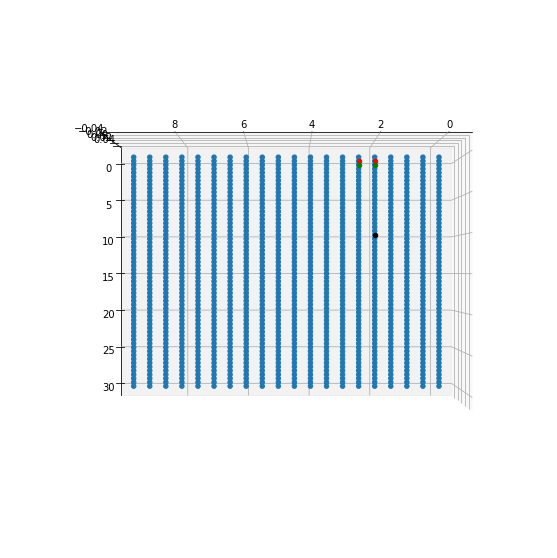

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter3D(points[:, 1], points[:, 2], points[:, 0])
starting_points = np.asarray([tuple(left_foot), tuple(right_foot), tuple(left_hand), tuple(right_hand)])

# define goal
found = False
goal = random.choice(points)
while(not found):
    found = True
    for point in starting_points:
        if np.array_equal(goal, point):
            found = False
            goal = random.choice(points)
print(goal)
goal_point = [10.0, 2.0, 0.0]

# goal_point = [12.80844156,  5.39007092,  0.75]
# goal_point = [4.6461039,  0.87234043, 1.0]
# goal_point = [5.08441558, 0.96453901, 1.6]

ax.scatter3D(left_foot[1], left_foot[2], left_foot[0], color='r')
ax.scatter3D(right_foot[1], right_foot[2], right_foot[0], color='r')
ax.scatter3D(right_hand[1], right_hand[2], right_hand[0], color='g')
ax.scatter3D(left_hand[1], left_hand[2], left_hand[0], color='g')

# Plot goal point
ax.scatter3D(goal_point[1], goal_point[2], goal_point[0], color='k')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
#ax.set_xlim(0, 600)
# ax.set_ylim(0, .4)
ax.view_init(180, 90)
# ax.view_init(90, -90)  # X-Y Axis
#ax.set_zlim(0, 600)
#figure(figsize=(8, 6), dpi=80)

### Get Starting Config of Robot

In [31]:
# Get starting config of robot
robot = gtd.CreateRobotFromFile(gtd.URDF_PATH + "/quad_climb_robot.urdf"); # robot object

# Joints for each contact
r_hand = "grab0" # leg 1 = red
r_elbow = "1"
r_shoulder_h = "8"
r_shoulder_v = "0"

l_hand = "grab1" # leg 2 = purple
l_elbow = "3"
l_shoulder_h = "9"
l_shoulder_v = "2"

r_foot = "grab2" # leg 3 = green
r_knee = "5"
r_hip_h = "10"
r_hip_v = "4"

l_foot = "grab3" # leg 4 = blue
l_knee = "7"
l_hip_h = "11"
l_hip_v = "6"

contact_in_com = [0, 0, 0]  # place on link, relative to link, that will be the contact point
LH = PointOnLink(robot.link(l_hand), contact_in_com)
LF = PointOnLink(robot.link(l_foot), contact_in_com)
RH = PointOnLink(robot.link(r_hand), contact_in_com)
RF = PointOnLink(robot.link(r_foot), contact_in_com)

l_hand_init = robot.link(l_hand).bMcom().translation()
l_foot_init = robot.link(l_foot).bMcom().translation()
r_hand_init = robot.link(r_hand).bMcom().translation()
r_foot_init = robot.link(r_foot).bMcom().translation()


contact_goals = [
    ContactGoal(LH, l_hand_init),
    ContactGoal(LF, l_foot_init),
    ContactGoal(RH, r_hand_init),
    ContactGoal(RF, r_foot_init),
    ]
# print(contact_goals)

# Solve to test env
kinematics = gtd.Kinematics()
result = kinematics.inverse(Slice(4), robot, contact_goals)
# print(result)

# print joint configs of robot at this position
joints = {}
# jointAngle_after_ik = gtd.JointAngleDouble(result, robot.joint(r_wrist).id(), 4) # 4 for slice(4)
# joint_names = [(joint.id(), joint.name(), gtd.JointAngleDouble(result, joint.id(), 4)) for joint in robot.joints()]
for joint in robot.joints():
    joints[joint.name()] = gtd.JointAngleDouble(result, joint.id(), 4)
# print(joints)

# Result
this = [goal.satisfied(result,k=4,tol=1e-3) for goal in contact_goals]
print(this)
passes_ik = all([goal.satisfied(result,k=4,tol=1e-3) for goal in contact_goals])
print(passes_ik)

[True, True, True, True]
True


### Simulate random configurations of robot to help IK solver
Due to the flexibility of the robot, the current IK solver is having a hard time solving. We beleive this is due to finding multiple local solutions for a robot configuration. We will attempt to create a database of possible joint-configurations that will allow us to start the solver at a closer location to the goal location.

For now we will simulate one are at a time. A joint-config database will be built for each arm. The location of the center of the robot body will stay the same while one arm moves in order to build a joint-config database for that arm.

In the most accurate solution, when one arm is moving to reach a goal, all arms could shift slightly in order to help the arm reach that goal. This would be too great of a space to simulate however.

For now we assume that once given an initial configuration the solver could have all arms move slightly if nessessary to reach a goal.

In [33]:
# sim settigns
interations = 100

In [34]:
# Create config database for left hand
left_hand_database = []

# Robot current location is already in initial position
# calculate distance of current location of EE to current location of center of robot.
loc_center_body = robot.link("body").bMcom().translation()
loc_left_hand = robot.link(l_hand).bMcom().translation()
print("loc: ", loc_left_hand)
dist = np.abs(loc_center_body - loc_left_hand)
print(dist)

# store distance and all joint configs in data structure
left_hand_database.append([dist, joints])
# later we will search this datastructure for similar L2 distances and use configs to start robot in close starting config.

count = 0
while(count < interations):
    # Move random contact point a little bit in a random direction
    idx = random.choice(range(len(loc_left_hand)))
    sign = [0, 1]
    sign_choice = random.choice(sign)
    if sign[sign_choice] is 0:
        loc_left_hand[idx] += 0.01
    else:
        loc_left_hand[idx] -= 0.01
    print("loc: ", loc_left_hand)

    # solve IK
    # If success, store configs in datastructure
    contact_goals = [
        ContactGoal(LH, loc_left_hand),
        ContactGoal(LF, robot.link(l_foot).bMcom().translation()),
        ContactGoal(RH, robot.link(r_hand).bMcom().translation()),
        ContactGoal(RF, robot.link(r_foot).bMcom().translation()),
        ]
    
    # Solve to test env
    kinematics = gtd.Kinematics()
    result = kinematics.inverse(Slice(4), robot, contact_goals)
    
    passes_ik = all([goal.satisfied(result,k=4,tol=1e-2) for goal in contact_goals])
    print(passes_ik)
    if passes_ik:
        # should I get the body pos before or after I move the arm?
        loc_center_body = robot.link("body").bMcom().translation()
        dist = np.abs(loc_center_body - loc_left_hand)
        left_hand_database.append([dist, joints])
        
        # Do I need to set robot joint angles before moving to next config?
        
    count+=1
    

loc:  [-0.44521242  0.402463   -0.02307521]
[0.44521242 0.402463   0.02307521]
loc:  [-0.44521242  0.402463   -0.03307521]
True
loc:  [-0.45521242  0.402463   -0.03307521]
True
loc:  [-0.46521242  0.402463   -0.03307521]
True
loc:  [-0.46521242  0.402463   -0.02307521]
True
loc:  [-0.46521242  0.392463   -0.02307521]
True
loc:  [-0.46521242  0.382463   -0.02307521]
True
loc:  [-0.46521242  0.392463   -0.02307521]
True
loc:  [-0.46521242  0.392463   -0.03307521]
True
loc:  [-0.46521242  0.392463   -0.04307521]
True
loc:  [-0.46521242  0.402463   -0.04307521]
True
loc:  [-0.46521242  0.412463   -0.04307521]
True
loc:  [-0.45521242  0.412463   -0.04307521]
True
loc:  [-0.44521242  0.412463   -0.04307521]
True
loc:  [-0.44521242  0.412463   -0.05307521]
True
loc:  [-0.45521242  0.412463   -0.05307521]
True
loc:  [-0.45521242  0.412463   -0.04307521]
True
loc:  [-0.45521242  0.412463   -0.03307521]
True
loc:  [-0.45521242  0.412463   -0.04307521]
True
loc:  [-0.45521242  0.412463   -0.03307

In [35]:
# Create config database for right hand
right_hand_database = []

# Put Robot in initial position
contact_goals = [
    ContactGoal(LH, l_hand_init),
    ContactGoal(LF, l_foot_init),
    ContactGoal(RH, r_hand_init),
    ContactGoal(RF, r_foot_init),
    ]

# Solve to test env
kinematics = gtd.Kinematics()
result = kinematics.inverse(Slice(4), robot, contact_goals)
passes_ik = all([goal.satisfied(result,k=4,tol=1e-2) for goal in contact_goals])
print("init successful: ", passes_ik)

# calculate distance of current location of EE to current location of center of robot.
loc_center_body = robot.link("body").bMcom().translation()
loc_right_hand = robot.link(r_hand).bMcom().translation()
print("loc: ", loc_right_hand)
dist = np.abs(loc_center_body - loc_right_hand)
print(dist)

# store distance and all joint configs in data structure
right_hand_database.append([dist, joints])
# later we will search this datastructure for similar L2 distances and use configs to start robot in close starting config.

count = 0
while(count < interations):
    # Move random contact point a little bit in a random direction
    idx = random.choice(range(len(loc_right_hand)))
    sign = [0, 1]
    sign_choice = random.choice(sign)
    if sign[sign_choice] is 0:
        loc_right_hand[idx] += 0.01
    else:
        loc_right_hand[idx] -= 0.01
    print("loc: ", loc_right_hand)

    # solve IK
    # If success, store configs in datastructure
    contact_goals = [
        ContactGoal(LH, robot.link(l_hand).bMcom().translation()),
        ContactGoal(LF, robot.link(l_foot).bMcom().translation()),
        ContactGoal(RH, loc_right_hand),
        ContactGoal(RF, robot.link(r_foot).bMcom().translation()),
        ]
    
    # Solve to test env
    kinematics = gtd.Kinematics()
    result = kinematics.inverse(Slice(4), robot, contact_goals)
    
    loc_center_body = robot.link("body").bMcom().translation()
    print("body_loc: ", loc_center_body)
    
    passes_ik = all([goal.satisfied(result,k=4,tol=1e-2) for goal in contact_goals])
    print(passes_ik)
    if passes_ik:
        # should I get the body pos before or after I move the arm?
        dist = np.abs(loc_center_body - loc_right_hand)
        right_hand_database.append([dist, joints])
        
        # Do I need to set robot joint angles before moving to next config?
        
    count+=1
    

init successful:  True
loc:  [ 0.44521309  0.40246222 -0.02307521]
[0.44521309 0.40246222 0.02307521]
loc:  [ 0.43521309  0.40246222 -0.02307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.43521309  0.39246222 -0.02307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.43521309  0.39246222 -0.01307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.42521309  0.39246222 -0.01307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.42521309  0.40246222 -0.01307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.41521309  0.40246222 -0.01307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.41521309  0.41246222 -0.01307521]
body_loc:  [0. 0. 0.]
True
loc:  [ 0.41521309  0.41246222 -0.00307521]
body_loc:  [0. 0. 0.]
True
loc:  [0.41521309 0.41246222 0.00692479]
body_loc:  [0. 0. 0.]
True
loc:  [0.42521309 0.41246222 0.00692479]
body_loc:  [0. 0. 0.]
True
loc:  [0.41521309 0.41246222 0.00692479]
body_loc:  [0. 0. 0.]
True
loc:  [0.42521309 0.41246222 0.00692479]
body_loc:  [0. 0. 0.]
True
loc:  [0.43521309 0.41246222 0.00692479]
body_loc:  [0. 0.

In [70]:
# Write Lookup Table-like function to find successful configs
def joint_look_up(contact_pos_dist, database):
    # print(database)
    
    # get all dists from database
    # dists = database[:, 0]
    lookup_dists = np.array([line[0] for line in database])
    contact_pos_dist_arr = np.tile(contact_pos_dist, (len(lookup_dists), 1))
    
    print(lookup_dists.shape)
    print(contact_pos_dist_arr.shape)
    
    # dists = lookup_dists[:, np.newaxis] - contact_pos_dist_arr
    dists = lookup_dists - contact_pos_dist_arr
    print(dists.shape)
    closest_value_idx = np.argmin(np.linalg.norm(dists))
    print(closest_value_idx)
    
    nearest_line = database[closest_value_idx]
    joint_angles = nearest_line[1]
    
    return joint_angles

In [71]:
# Test Joint Configuration Look-Up
right_hand_pos = np.array([0.28521309, 0.30246222, 0.06692479])
body_pos = np.array([0.0, 0.0, 0.0])
dist = np.abs(body_pos - right_hand_pos)

joint_angle = joint_look_up(dist, right_hand_database)
print(joint_angle)

(101, 3)
(101, 3)
(101, 3)
0
{'0': 0.0758127321555391, '1': 0.040940643819162535, '10': 0.01755834340831484, '11': 0.0004903585571744421, '12': -0.04659357489505304, '13': 0.02961439556702899, '14': 0.05375776815123861, '15': 0.02126044193772941, '2': 0.01787095588343639, '3': -0.017760681248799794, '4': 0.009816100490985481, '5': 0.015749333414912067, '6': -0.05436054446594713, '7': -0.03710172058064784, '8': -0.009696873399068481, '9': -0.027099568052507884}


### Move Robot to Starting Position

In [38]:
import find_holds
# find_holds.get_possible_holds(points, starting_config)
r_hand = "grab0" # leg 1 = red
l_hand = "grab1" # leg 2 = purple
r_foot = "grab2" # leg 3 = green
l_foot = "grab3" # leg 4 = blue
# v1 - use 0,0,0
com = [0,0,0]
LH = PointOnLink(robot.link(l_hand), com)
LF = PointOnLink(robot.link(l_foot), com)
RH = PointOnLink(robot.link(r_hand), com)
RF = PointOnLink(robot.link(r_foot), com)

# print(robot.link(l_hand).id())  # 16
# print(robot.link(r_hand).id())  # 12
# print(robot.link(l_foot).id())  # 8
# print(robot.link(r_foot).id())  # 4

# # v2 - use the original location -- WORKS
# contact_goals = [
#     ContactGoal(LH, robot.link(l_hand).bMcom().translation()),
#     ContactGoal(LF, robot.link(l_foot).bMcom().translation()),
#     ContactGoal(RH, robot.link(r_hand).bMcom().translation()),
#     ContactGoal(RF, robot.link(r_foot).bMcom().translation()),
#     ]

# Use the new location
contact_goals = [
                    ContactGoal(LH, left_hand_ik),
                    ContactGoal(LF, left_foot_ik),
                    ContactGoal(RH, right_hand_ik),
                    ContactGoal(RF, right_foot_ik),
                ]

# print("start: ", robot.link(l_hand).bMcom().translation)
# print("ex: ", left_hand)
params = gtd.KinematicsParameters()
params.lm_parameters.setVerbosityLM("TRYLAMBDA")
kinematics = gtd.Kinematics(params)
result = kinematics.inverse(Slice(4), robot, contact_goals)
# print(result.__repr__("", gtd.GTDKeyFormatter))

print("ex: ", right_hand)
pose_after_ik_r_hand = gtd.Pose(result, robot.link(r_hand).id(), 4) # 4 for slice(4)
print(pose_after_ik_r_hand)

print("ex: ", left_hand)
pose_after_ik_l_hand = gtd.Pose(result, robot.link(l_hand).id(), 4)
print(pose_after_ik_l_hand)

# print("ex: ", right_foot)
# pose_after_ik_r_foot = gtd.Pose(result, robot.link(r_foot).id(), 4)
# print(pose_after_ik_r_foot)

# print("ex: ", left_foot)
# pose_after_ik_l_foot = gtd.Pose(result, robot.link(l_foot).id(), 4)
# print(pose_after_ik_l_foot)

# Result
this = [goal.satisfied(result,k=4,tol=1e-2) for goal in contact_goals]
print(this)
passes_ik = all([goal.satisfied(result,k=4,tol=1e-2) for goal in contact_goals])
print(passes_ik)

ex:  [1.0, 2.5, 0.0]
R: [
	-0.573936, 0.588064, 0.569893;
	-0.464866, -0.806891, 0.364454;
	0.674164, -0.0557509, 0.736475
]
t:   0.510375   0.449426 -0.0288594

ex:  [1.0, 2.0, 0.0]
R: [
	0.466115, 0.607194, -0.643469;
	-0.336067, 0.794311, 0.506093;
	0.818411, -0.0196492, 0.574298
]
t:  -0.370635   0.403267 -0.0728233

[False, False, False, False]
False


In [36]:
starting_config = [tuple(right_foot), tuple(left_foot), tuple(right_hand), tuple(left_hand)] #right foot, left foot,  right hand, left hand

# starting_config = [tuple(right_foot), tuple(left_foot), tuple([2.80032468, 1.74940898, 0.0]), tuple(left_hand)] #right foot, left foot,  right hand, left hand

path = find_holds.uniform_cost_search(points, np.asarray(starting_config), tuple(goal_point))

In [37]:
a, b = path
a

ValueError: not enough values to unpack (expected 2, got 0)

In [80]:
b

NameError: name 'b' is not defined

In [81]:
config_flow = [np.fromstring(i).reshape((4, 3)) for i in a]
config_flow  

NameError: name 'a' is not defined

In [82]:
list(G.edges(data=True))[:-100]

NameError: name 'G' is not defined

In [ ]:
import networkx as nx
# initial_holds = np.asarray(starting_config).tostring()
initial_holds = np.asarray(starting_config).tobytes()
goal_hold = b'\x9a\x99\x99\x99\x99\x99\xc9?\x14\xaeG\xe1z\x14\x0e@\x00\x00\x00\x00\x00\x00\x00\x00\xecQ\xb8\x1e\x85\xeb\xd1?\x85\xebQ\xb8\x1e\x85\x13@{\x14\xaeG\xe1z\x84?333333\x15@\xcd\xcc\xcc\xcc\xcc\xcc\x08@\xdb\xf9~j\xbct\xa3?\x85\xebQ\xb8\x1e\x85\xeb?\xe1z\x14\xaeG\xe1\x10@\xfc\xa9\xf1\xd2Mb\xa0?'
nodes_to_goal = list(nx.all_simple_paths(G, source=initial_holds, target=goal_hold))[0]
path_to_goal = [np.fromstring(i) for i in list(nx.all_simple_paths(G, source=initial_holds, target=goal_hold))[0]]
nodes_to_goal

In [ ]:
print(len(config_flow))

colors = ['r', 'b', 'g', 'c']

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

points = graph.points_from_image()
points[:, 2] = points[:, 2] + 300
points = (points / 50) / 32

print(points[:, 2])
def f(x, y):
    return -(abs(x) + abs(y))

#ax.plot_trisurf(points[:, 1], points[:, 2], points[:, 0],
               #cmap='viridis', edgecolor='none');
ax.scatter3D(points[:, 1], points[:, 2], points[:, 0])
# for i in config_flow:
# #     val = i.reshape((4, 3))
#     ax.scatter3D(i[2:3, 1], i[2:3, 2] + 6, i[2:3, 0])
#     break

for i, j in zip(config_flow[:-1], config_flow[1:]):
    #print(i, j)
    config_changes = np.nonzero(i - j)
    k = config_changes[0][0]
    v1 = i[config_changes] / 32
    v2 = j[config_changes] / 32
    if len(v1) == 2:
        v1 = (v1[0], v1[1], .03 / 32)
        v2 = (v2[0], v2[1], .03 / 32)
    v1 = (v1[0], v1[1], v1[2] + 0.1875)
    v2 = (v2[0], v2[1], v2[2] + 0.1875)
    #print(v1, v2)
    ax.plot([v1[1], v2[1]], [v1[2], v2[2]], [v1[0], v2[0]], color = colors[k])
    k = k + 1
    #break
    #break
starting_points = np.asarray([tuple([.2, 3.76, 0.0]), tuple([.28, 4.88, 0.01]), tuple([1.22, 3.08, 0.035]), tuple([1.48, 4.56, 0.03])])
starting_points[:, 2] = starting_points[:, 2] + 6
starting_points = starting_points / 32
ax.scatter3D(starting_points[:, 1], starting_points[:, 2], starting_points[:, 0], color='r')

goal_point = np.asarray((5.300e+00, 3.100e+00, 3.800e-02))
goal_point[2] = goal_point[2] + 6
goal_point = goal_point / 32
ax.scatter3D(goal_point[1], goal_point[2], goal_point[0], color='k')


#ax.scatter3D(config_flow[-1][:, 1], config_flow[-1][:, 2] + 0.1875, config_flow[-1][:, 0])
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
#ax.set_xlim(0, 600)
ax.set_ylim(0, .4)